# Análise Exploratória de Dados

## 1) Entendimento dos dados:

In [1]:
# Import das bibliotecas necessárias
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Import dos dados
df = pd.read_csv('../dados/processed/car_price_dataset_clean.csv')
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


### Dicionário dos dados:

| Coluna        | Tipo Estatístico | Tipo Computacional | Significado                                                                 |
|---------------|------------------|--------------------|----------------------------------------------------------------------------|
| Brand         | Qualitativo      | object (string)    | Marca do veículo                                                           |
| Model         | Qualitativo      | object (string)    | Modelo do veículo                                                          |
| Year          | Qualitativo     | int64              | Ano de fabricação do veículo                                               |
| Engine_Size   | Quantitativo     | float64            | Tamanho do motor do veículo (em litros)                                    |
| Fuel_Type     | Qualitativo      | object (string)    | Tipo de combustível utilizado pelo veículo                                 |
| Transmission  | Qualitativo      | object (string)    | Tipo de transmissão do veículo (Manual, Automática, Semi-Automática, etc.) |
| Mileage       | Quantitativo     | int64              | Quilometragem rodada pelo veículo                                          |
| Doors         | Quantitativo     | int64              | Número de portas do veículo                                                |
| Owner_Count   | Quantitativo     | int64              | Número de proprietários anteriores                                         |
| Price         | Quantitativo     | int64              | Preço do veículo (em unidade monetária)                                    |

## 2) Análise Univariada

In [52]:
# Criando funções para análise univariada
def estatistica_qualitativa(df, column):
    coluna = df[column].copy()
    contagem = coluna.value_counts()
    proporcao = coluna.value_counts(normalize=True) * 100
    df_resumo = pd.DataFrame({'Contagem': contagem, 'Proporção (%)': proporcao})
    df_resumo.index.name = column
    df_resumo.reset_index(inplace=True)
    df_resumo['Proporção (%)'] = df_resumo['Proporção (%)'].round(2)
    return df_resumo

def plot_histogram(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')
    plt.grid()
    plt.show()

def plot_boxplot(df, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)
    plt.grid()
    plt.show()

def plot_bar(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[column], order=df[column].value_counts(normalize=True).index)
    plt.title(f'Contagem de {column}')
    plt.xlabel('Frequência')
    plt.ylabel(column)
    plt.grid()
    plt.show()

def plot_pie(df, column):
    plt.figure(figsize=(10, 6))
    df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
    plt.title(f'Gráfico de Pizza de {column}')
    plt.ylabel('')
    plt.grid()
    plt.show()

### `Brand`:

In [23]:
estatistica_qualitativa(df, 'Brand')

,Brand,Contagem,Proporção (%)
0,Ford,1048,10.48
1,Audi,1038,10.38
2,Volkswagen,1020,10.20
3,Honda,1009,10.09
4,Chevrolet,1003,10.03
5,BMW,999,9.99
6,Hyundai,995,9.95
7,Kia,976,9.76
8,Toyota,970,9.70
9,Mercedes,942,9.42


In [26]:
diferenca_max_min = df['Brand'].value_counts().max() - df['Brand'].value_counts().min()
proporcao_max_min = (diferenca_max_min / df['Brand'].value_counts().min()) * 100

print(f'Diferença entre a marca mais frequente e a menos frequente: {diferenca_max_min}')
print(f'Quantidade de registros da marca mais frequente: {df["Brand"].value_counts().max()}')

print(f'Proporção da diferença em relação à marca menos frequente: {proporcao_max_min:.2f}%')

Diferença entre a marca mais frequente e a menos frequente: 106
Quantidade de registros da marca mais frequente: 1048
Proporção da diferença em relação à marca menos frequente: 11.25%


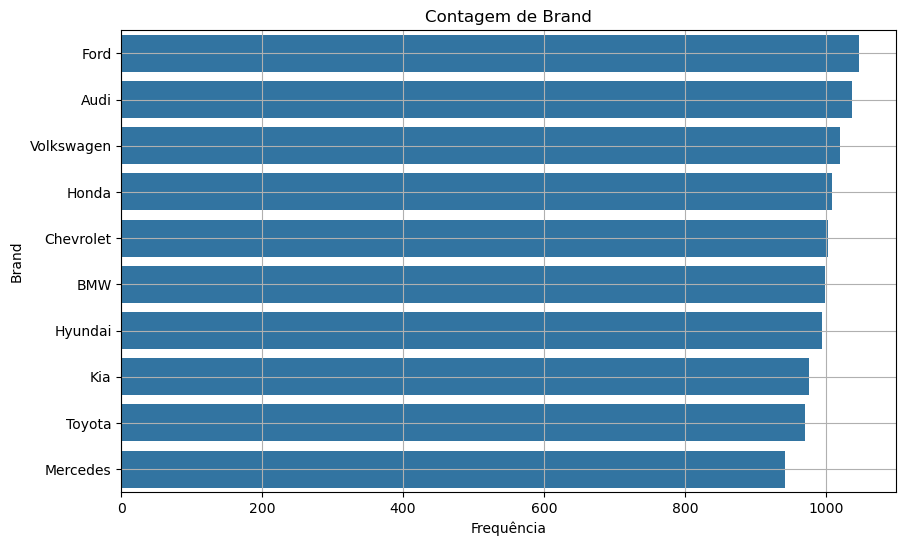

In [31]:
plot_bar(df, 'Brand')

> Há uma quantidade balanceada de registros de cada Marca de carro, havendo no total 10 valores de marcas de carros, como exibidos na tabela acima

> A Ford é a marca com maior quantidade de veículos, porém tem apenas 11.25% dados a mais em relação a marca com menor quantidade de veículos (Mercedes)

### `Model`:

In [33]:
estatistica_qualitativa(df, 'Model')

,Model,Contagem,Proporção (%)
0,Accord,365,3.65
1,Fiesta,363,3.63
2,Impala,355,3.55
3,5 Series,353,3.53
4,Tiguan,352,3.52
5,Focus,351,3.51
6,Q5,350,3.50
7,A4,350,3.50
8,Elantra,347,3.47
9,Golf,339,3.39


In [35]:
diferenca_max_min = df['Model'].value_counts().max() - df['Model'].value_counts().min()
proporcao_max_min = (diferenca_max_min / df['Brand'].value_counts().min()) * 100

print(f'Diferença entre a marca mais frequente e a menos frequente: {diferenca_max_min}')
print(f'Quantidade de registros da marca mais frequente: {df["Model"].value_counts().max()}')

print(f'Proporção da diferença em relação à marca menos frequente: {proporcao_max_min:.2f}%')

Diferença entre a marca mais frequente e a menos frequente: 59
Quantidade de registros da marca mais frequente: 365
Proporção da diferença em relação à marca menos frequente: 6.26%


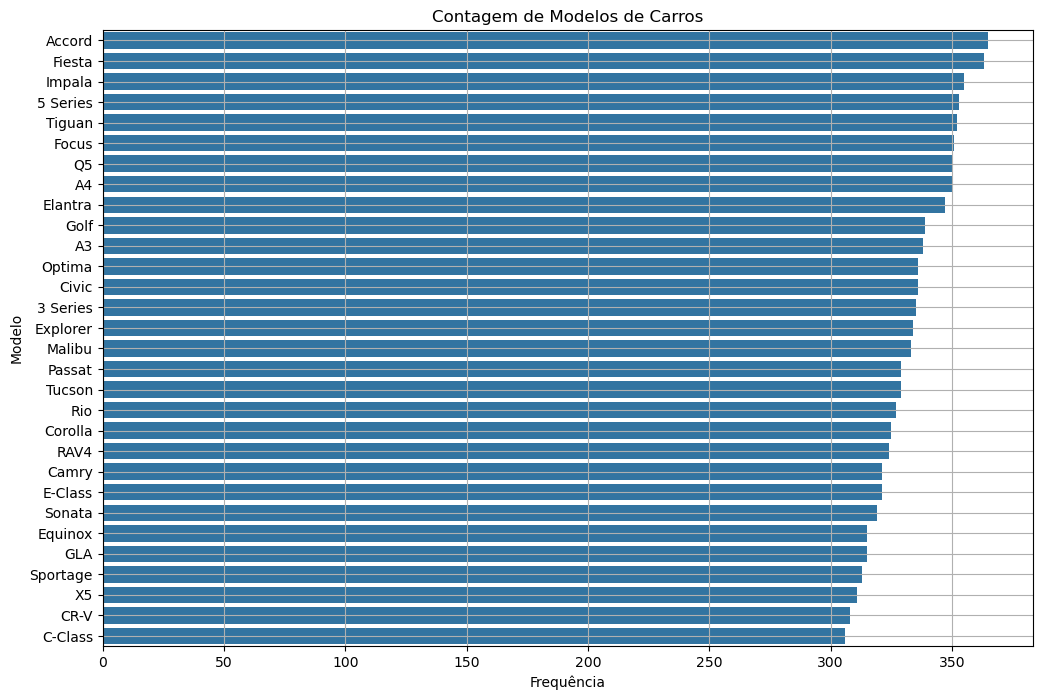

In [36]:
# Plotar grafico de barras horizontais que possa suportar 29 modelos de carros
plt.figure(figsize=(12, 8))
sns.countplot(y=df['Model'], order=df['Model'].value_counts().index)
plt.title('Contagem de Modelos de Carros')
plt.xlabel('Frequência')
plt.ylabel('Modelo')
plt.grid()  
plt.show()


> Mesmo havendo um total de 29 modelos, não há uma diferença significativa entre a quantidade de dados de carro por marca, garantindo um balanceamento para tal fator

> O Accord é o modelo com maior quantidade de veículos, porém tem apenas 6.26% dados a mais em relação ao modelo com menor quantidade de veículos (C-Class)

### `Year`:

In [40]:
df['Year'].describe()

count    10000.000000
mean      2011.543700
std          6.897699
min       2000.000000
25%       2006.000000
50%       2012.000000
75%       2017.000000
max       2023.000000
Name: Year, dtype: float64

> No atual contexto, a variável ano na verdade se encaixa majoritariamente como qualitativa do que como quantitativa, por não indicar uma contagem ou um registro contínuo, mas sim um timestamp.

In [41]:
estatistica_qualitativa(df, 'Year')

,Year,Contagem,Proporção (%)
0,2002,462,4.62
1,2011,449,4.49
2,2023,448,4.48
3,2012,437,4.37
4,2017,433,4.33
5,2005,431,4.31
6,2010,431,4.31
7,2007,430,4.30
8,2015,426,4.26
9,2018,425,4.25


In [45]:
diferenca_max_min = df['Year'].value_counts().max() - df['Year'].value_counts().min()
proporcao_max_min = (diferenca_max_min / df['Year'].value_counts().min()) * 100

print(f'Diferença entre o ano com mais veículos e ano com menos: {diferenca_max_min}')
print(f'Quantidade de registros do ano que mais aparece: {df["Year"].value_counts().max()}')

print(f'Proporção da diferença em relação aos anos de veículos: {proporcao_max_min:.2f}%')

Diferença entre o ano com mais veículos e ano com menos: 81
Quantidade de registros do ano que mais aparece: 462
Proporção da diferença em relação aos anos de veículos: 21.26%


Text(0.5, 1.0, 'Contagem de Anos de Carros')

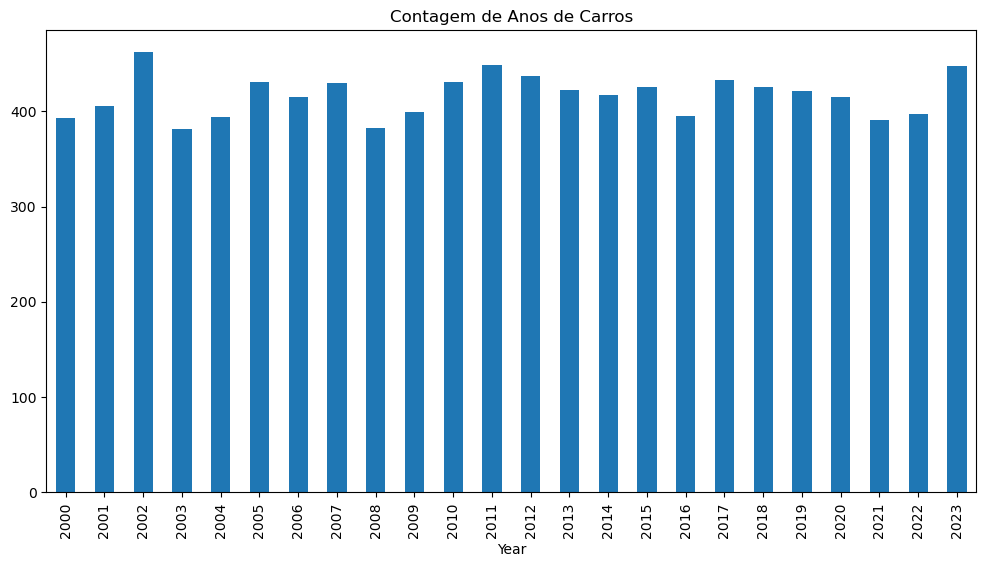

In [39]:
df['Year'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.title('Contagem de Anos de Carros')

In [50]:
# Análise por decada
df_2000s = df[df['Year'].between(2000, 2009)]
df_2010s = df[df['Year'].between(2010, 2019)]
df_2020s = df[df['Year'] >= 2020]

print(f'Quantidade de veículos dos anos 2000: {len(df_2000s)}')
print(f'Quantidade de veículos dos anos 2010: {len(df_2010s)}')
print(f'Quantidade de veículos dos anos 2020: {len(df_2020s)}')

Quantidade de veículos dos anos 2000: 4093
Quantidade de veículos dos anos 2010: 4256
Quantidade de veículos dos anos 2020: 1651


> Há um leve desbalanceamento em relação a quantidade de veículos por ano, e ainda maior considerando por década, onde há uma quantidade relativamente menor de veículos da década de 2020 e prepoderância da década de 2010.

### `Engine_Size`:

In [53]:
df['Engine_Size'].describe()

count    10000.000000
mean         3.000560
std          1.149324
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Engine_Size, dtype: float64

In [54]:
df['Engine_Size'].value_counts()

Engine_Size
3.7    273
4.4    271
3.6    267
2.5    266
1.5    265
4.0    263
2.8    262
4.6    262
1.3    261
2.2    259
1.4    259
2.6    259
1.6    258
2.0    258
4.1    257
3.5    256
3.1    254
3.3    254
4.7    253
3.8    253
2.9    253
1.2    251
4.5    250
2.7    250
3.2    249
1.8    249
4.9    247
1.7    246
3.4    243
4.3    242
2.4    240
3.0    236
3.9    236
2.1    234
4.2    232
1.9    232
4.8    231
1.1    230
2.3    223
1.0    113
5.0    103
Name: count, dtype: int64

In [61]:
# Agrupando motores
def categorize_engine_size(size):
    if size < 1.0:
        return 'Menos de 1.0L'
    elif 1.0 <= size < 1.5:
        return '1.0L a 1.5L'
    elif 1.5 <= size < 2.0:
        return '1.5L a 2.0L'
    elif 2.0 <= size < 2.5:
        return '2.0L a 2.5L'
    else:
        return 'Mais de 2.5L'
    
df_agrupamento = df.copy()
df_agrupamento['Engine_Size_Category'] = df_agrupamento['Engine_Size'].apply(categorize_engine_size)
estatistica_qualitativa(df_agrupamento, 'Engine_Size_Category')

,Engine_Size_Category,Contagem,Proporção (%)
0,Mais de 2.5L,6422,64.22
1,1.5L a 2.0L,1250,12.50
2,2.0L a 2.5L,1214,12.14
3,1.0L a 1.5L,1114,11.14


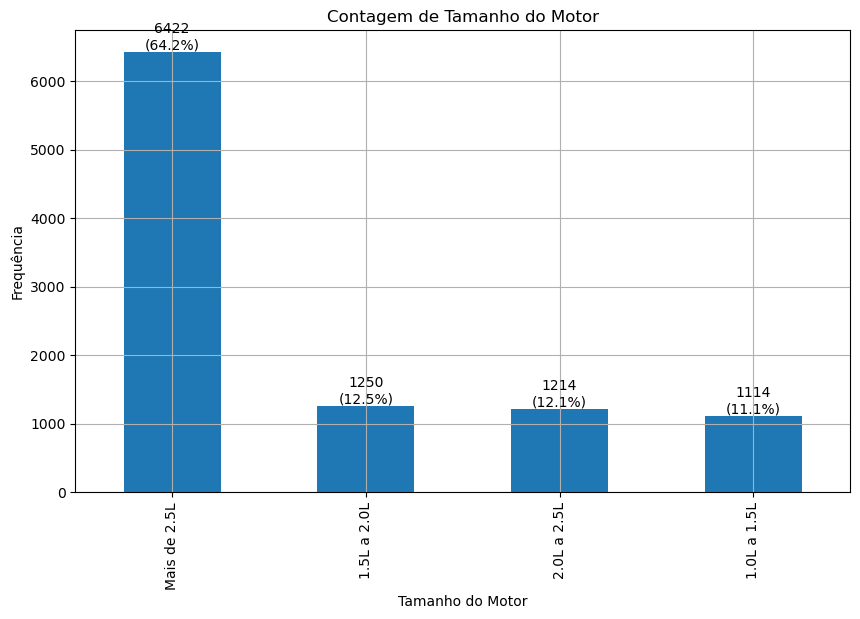

In [67]:
# Plotar gráfico de barras para categorias de tamanho do motor com números e porcentagem
ax = df_agrupamento['Engine_Size_Category'].value_counts().plot(
    kind='bar', figsize=(10, 6)
)
plt.title('Contagem de Tamanho do Motor')
plt.xlabel('Tamanho do Motor')
plt.ylabel('Frequência')
plt.grid()

# Adiciona os valores absolutos e percentuais acima das barras
total = len(df_agrupamento)
for p in ax.patches:
    valor = int(p.get_height())
    percentual = valor / total * 100
    ax.annotate(f'{valor}\n({percentual:.1f}%)',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.show()


> Há uma disparidade grande em relação a quantidade de veículos com volume interno do maior que 2.5L e os de quantia menor.

> Os de volume interno do motor maior que 2.5L representam mais de 64,2% dos veículos, enquanto que os demais grupos tem seus aproximados 12% de dados representativos da categoria